## **FIFA International World Cup Dataset**

### **Load and Understanding Data**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [2]:
# Read the Dataset using pandas dataframe

fifa_data = pd.read_excel('/content/FIFA_Worldcup_Data.xlsx')

In [3]:
# view first few columns

fifa_data.head()

,team,team_code,tournament_id,games_played,games_won,draws,goals_scored,goals_conceded,penalty_shootout,group_stage_win,round_of_16_win,quarter_final_win,semi_final_win,third_place_match_win,final_win
0,Norway,NOR,WC-1991,6,4,0,14,10,0,2,0,1,1,0,0
1,USA,USA,WC-1991,6,6,0,25,5,0,3,0,1,1,0,1
2,Sweden,SWE,WC-1991,6,4,0,18,7,0,2,0,1,0,1,0
3,Germany,DEU,WC-1991,6,4,0,13,10,0,3,0,1,0,0,0
4,Italy,ITA,WC-1991,4,2,0,8,5,0,2,0,0,0,0,0


In [4]:
# Total rows and columns

fifa_data.shape

(136, 15)

In [5]:
fifa_data.columns

Index(['team', 'team_code', 'tournament_id', 'games_played', 'games_won',
       'draws', 'goals_scored', 'goals_conceded', 'penalty_shootout',
       'group_stage_win', 'round_of_16_win', 'quarter_final_win',
       'semi_final_win', 'third_place_match_win', 'final_win'],
      dtype='object')

In [6]:
fifa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   team                   136 non-null    object
 1   team_code              136 non-null    object
 2   tournament_id          136 non-null    object
 3   games_played           136 non-null    int64 
 4   games_won              136 non-null    int64 
 5   draws                  136 non-null    int64 
 6   goals_scored           136 non-null    int64 
 7   goals_conceded         136 non-null    int64 
 8   penalty_shootout       136 non-null    int64 
 9   group_stage_win        136 non-null    int64 
 10  round_of_16_win        136 non-null    int64 
 11  quarter_final_win      136 non-null    int64 
 12  semi_final_win         136 non-null    int64 
 13  third_place_match_win  136 non-null    int64 
 14  final_win              136 non-null    int64 
dtypes: int64(12), object(3)

### **Descriptive Statistics (Mean,Median,Std)**

In [7]:
fifa_data.describe()

,games_played,games_won,draws,goals_scored,goals_conceded,penalty_shootout,group_stage_win,round_of_16_win,quarter_final_win,semi_final_win,third_place_match_win,final_win
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,4.176471,1.801471,0.573529,6.742647,6.742647,0.058824,1.272059,0.110294,0.205882,0.117647,0.051471,0.044118
std,1.298902,1.820947,0.695300,5.871458,3.681780,0.236164,1.043263,0.314414,0.405840,0.323381,0.221772,0.206116
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,1.000000,0.000000,5.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,3.000000,1.000000,10.000000,8.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.000000,7.000000,3.000000,26.000000,20.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### **Exploratory Data Analysis (EDA)**

**Find Distribution of few columns in the Dataset**

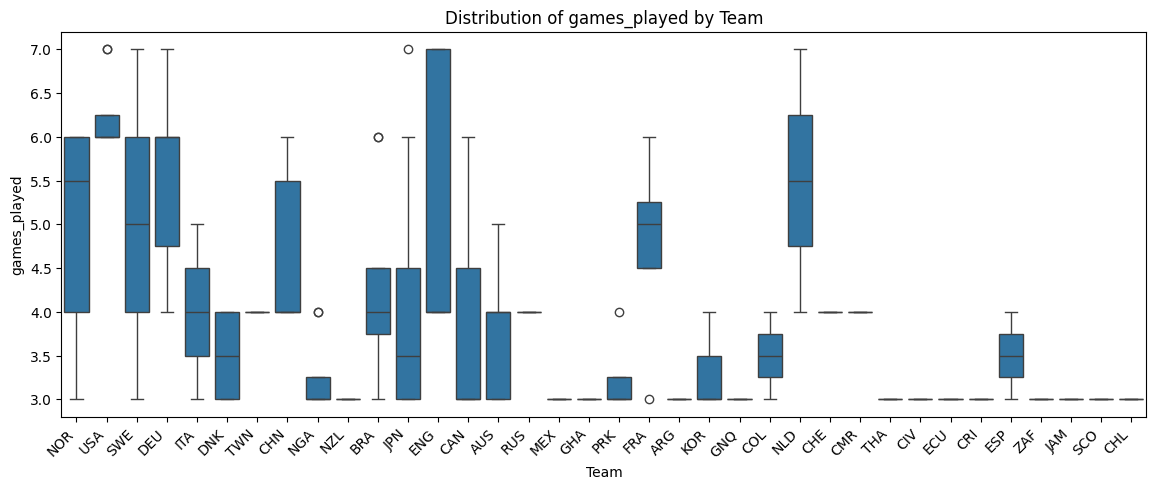

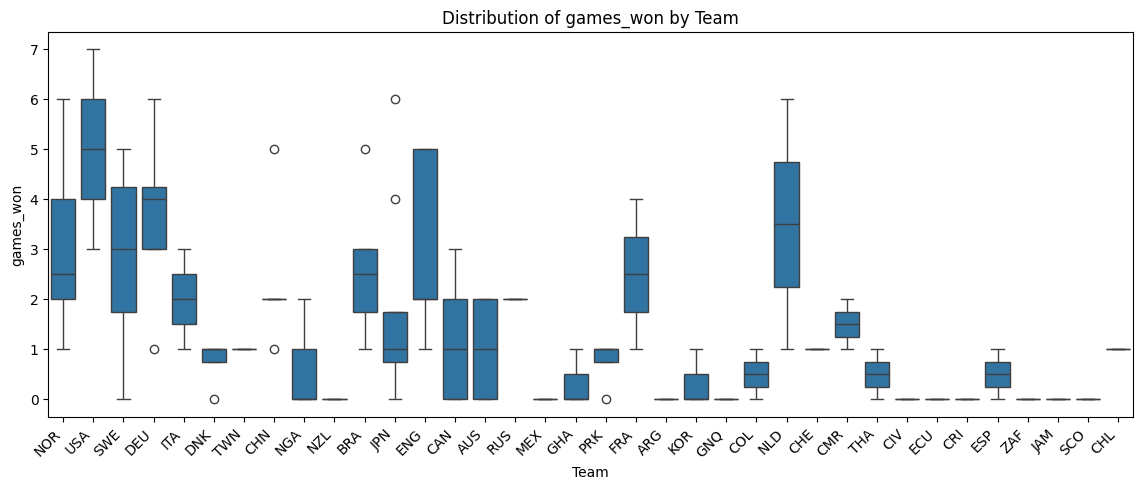

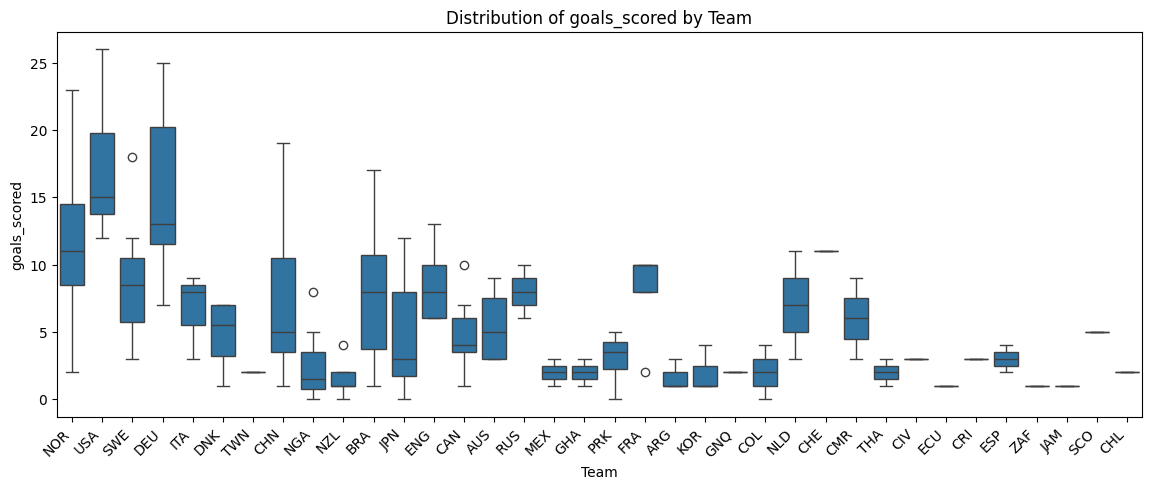

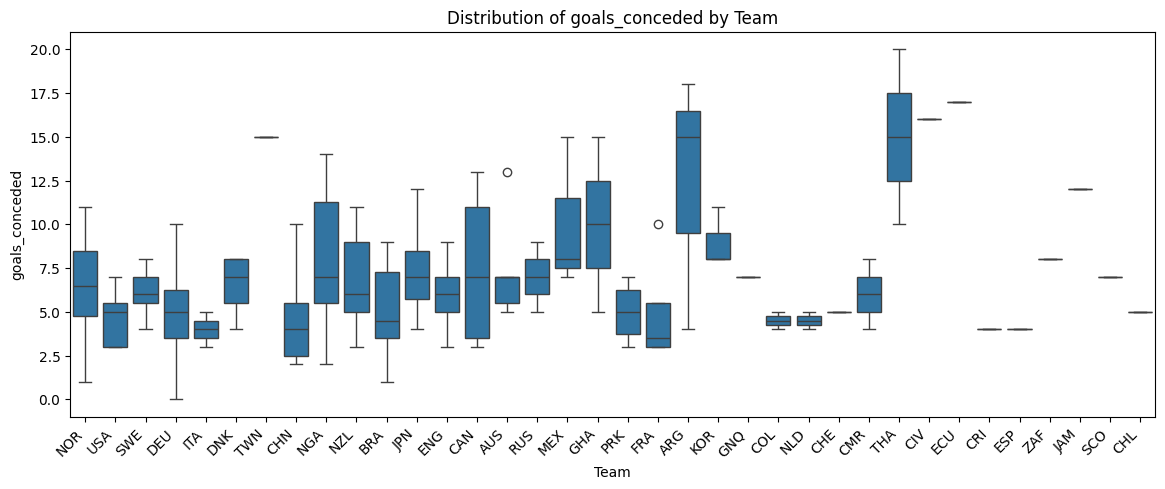

In [8]:
# Create box plots for distributions of each team

for column in ['games_played', 'games_won', 'goals_scored','goals_conceded']:
  plt.figure(figsize=(14, 5))
  # Use the column variable directly instead of the string 'column'
  sns.boxplot(x='team_code', y=column, data=fifa_data)
  plt.title(f'Distribution of {column} by Team')
  plt.xlabel('Team')
  # Use the column variable for the y-axis label as well
  plt.ylabel(column)
  plt.xticks(rotation=45, ha='right')
  plt.show()

**Find Penalty Shootout and Draws Per Team**

In [9]:
print(fifa_data.columns)

Index(['team', 'team_code', 'tournament_id', 'games_played', 'games_won',
       'draws', 'goals_scored', 'goals_conceded', 'penalty_shootout',
       'group_stage_win', 'round_of_16_win', 'quarter_final_win',
       'semi_final_win', 'third_place_match_win', 'final_win'],
      dtype='object')


**Find Total Penalty Shooutout Per Team**

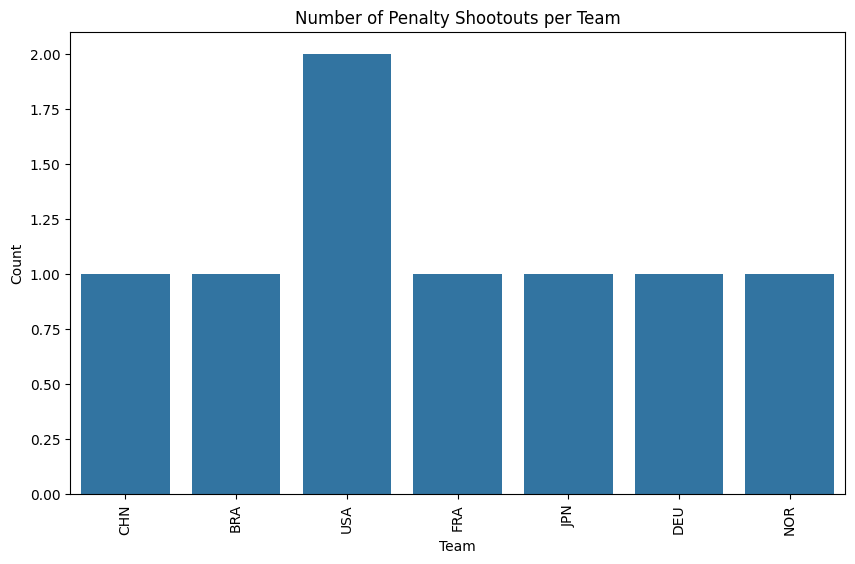

In [10]:
# Assuming your DataFrame is named 'fifa_data'
penalty_shootout = fifa_data[fifa_data['penalty_shootout'] > 0]
# Filter for matches with penalty shootouts

plt.figure(figsize=(10, 6))
sns.countplot(x='team_code', data=penalty_shootout)
plt.title('Number of Penalty Shootouts per Team')
plt.xlabel('Team')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**Find Total Draws by Team**

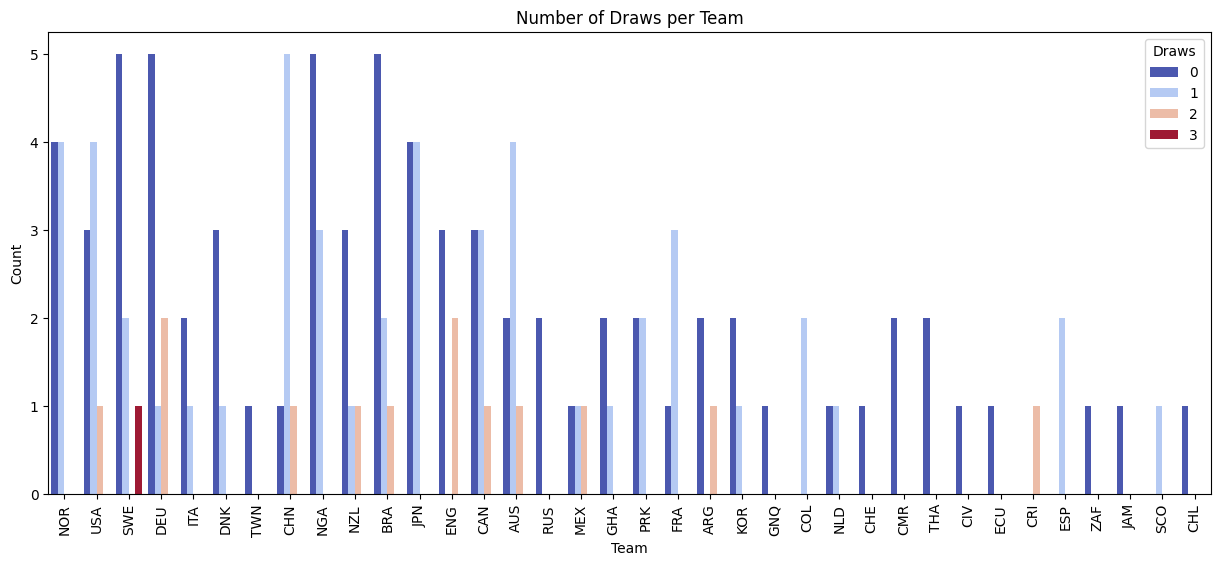

In [11]:
plt.figure(figsize=(15, 6))
sns.countplot(x='team_code', data=fifa_data, hue='draws', palette='coolwarm')
plt.title('Number of Draws per Team')
plt.xlabel('Team')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Draws')  # Add a legend for clarity
plt.show()

**Find Average Goals Scored by Team**

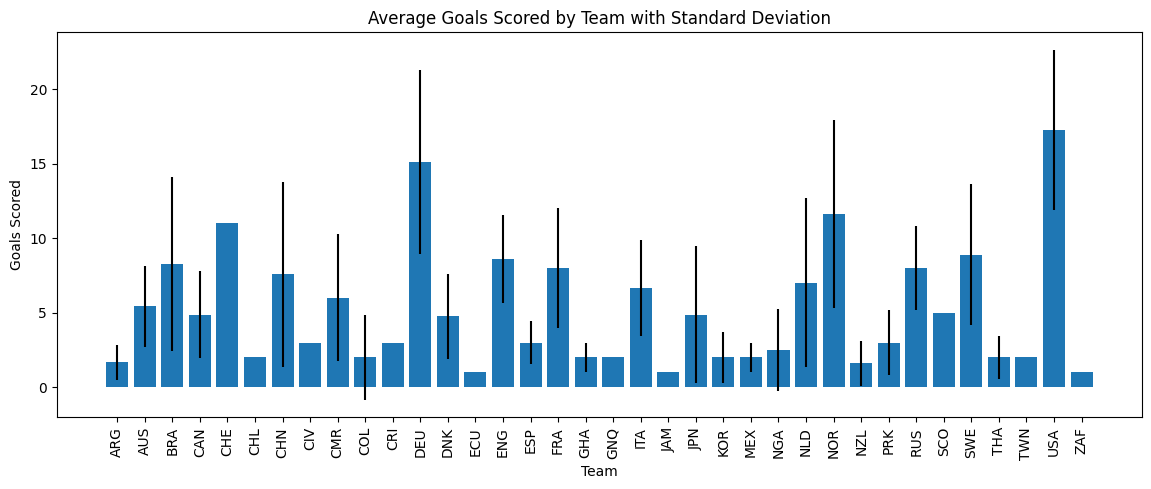

In [27]:
# Calculate mean and standard deviation
team_goals_stats = fifa_data.groupby('team_code')['goals_scored'].agg(['mean', 'std'])

# Create a bar chart with error bars
plt.figure(figsize=(14, 5))
plt.bar(team_goals_stats.index, team_goals_stats['mean'], yerr=team_goals_stats['std'])
plt.title('Average Goals Scored by Team with Standard Deviation')
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Goals Scored')
plt.show()

**Find overall WinRate**

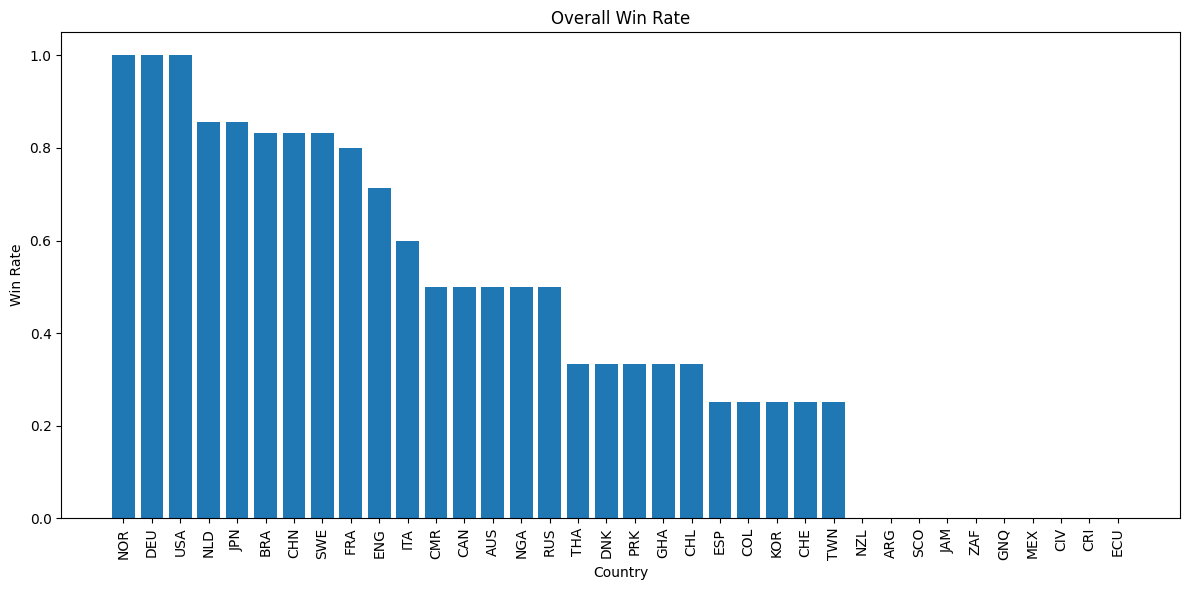

In [13]:
# Calculate overall win rate
fifa_data['win_rate'] = fifa_data['games_won'] / fifa_data['games_played']

# Sort by win rate for better visualization
sorted_data = fifa_data.sort_values(by=['win_rate'], ascending=False)

# Create bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(sorted_data['team_code'], sorted_data['win_rate'])
plt.xlabel('Country')
plt.ylabel('Win Rate')
plt.title('Overall Win Rate')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

**Find Stage-wise Win distribution for each team using a bar graph.**

In [14]:
# Create a new DataFrame to store the total wins of each stage

stage_wins = pd.DataFrame(index=fifa_data['team_code'].unique())

# Calculate total wins for each stage and add them as columns to the new DataFrame
for stage in ['group_stage_win', 'round_of_16_win', 'quarter_final_win', 'semi_final_win', 'third_place_match_win', 'final_win']:
    stage_wins[stage] = fifa_data.groupby('team_code')[stage].sum()


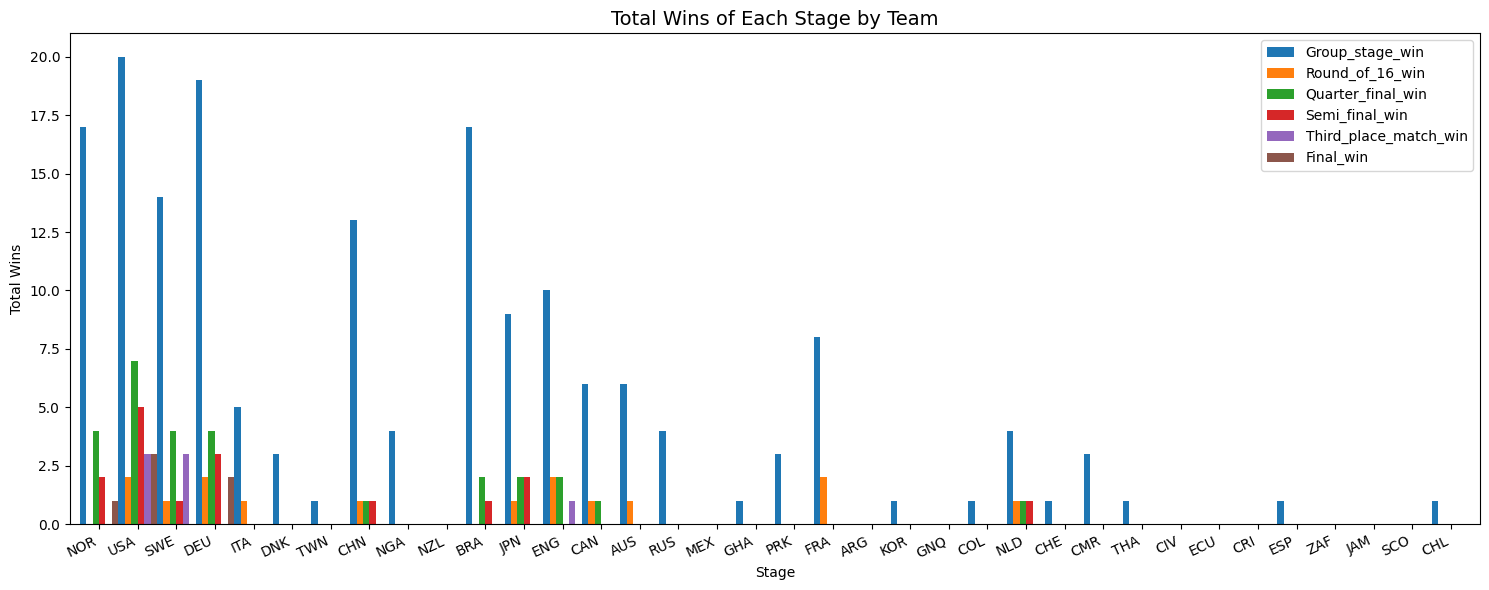

In [15]:
# Create a bar chart
stage_wins.plot(kind='bar', figsize=(15, 6), width=1.0)
plt.xlabel("Stage", fontsize=10)
plt.ylabel("Total Wins", fontsize=10)
plt.title("Total Wins of Each Stage by Team", fontsize=14)
plt.xticks(rotation=25, ha='right')     # Rotate x-axis labels for better readability
plt.legend(labels=['Group_stage_win', 'Round_of_16_win', 'Quarter_final_win', 'Semi_final_win', 'Third_place_match_win', 'Final_win'])
plt.tight_layout()
plt.show()

**Find Total wins per team**

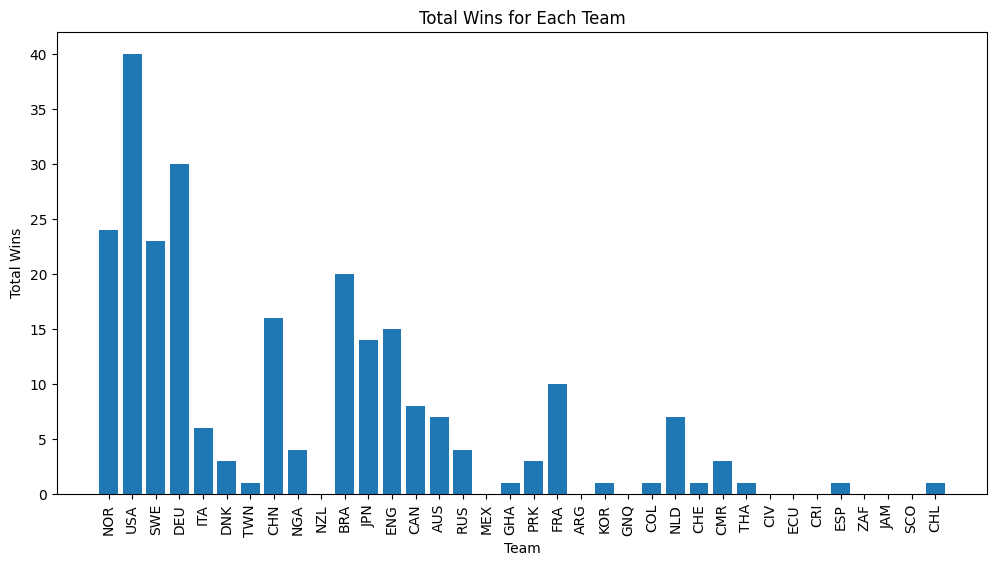

In [26]:
all_stage_wins = pd.DataFrame(index=fifa_data['team_code'].unique(), columns=['Total Wins'])

for team in fifa_data['team_code'].unique():
    team_wins = fifa_data[fifa_data['team_code'] == team][['group_stage_win', 'round_of_16_win', 'quarter_final_win', 'semi_final_win', 'third_place_match_win', 'final_win']].sum(axis=1).sum()
    all_stage_wins.loc[team, 'Total Wins'] = team_wins

# Barplot to visualize Total wins for Each Team.

plt.figure(figsize=(12, 6))
plt.bar(all_stage_wins.index, all_stage_wins['Total Wins'])
plt.xlabel('Team')
plt.ylabel('Total Wins')
plt.title('Total Wins for Each Team')
plt.xticks(rotation=90)
plt.show()

**Observation:** While the USA team has shown improvement and occasional strong performances in specific tournaments, they are not yet among the teams consistently winning high-level tournaments compared to others.

**Find Correlation Matrix between variables**

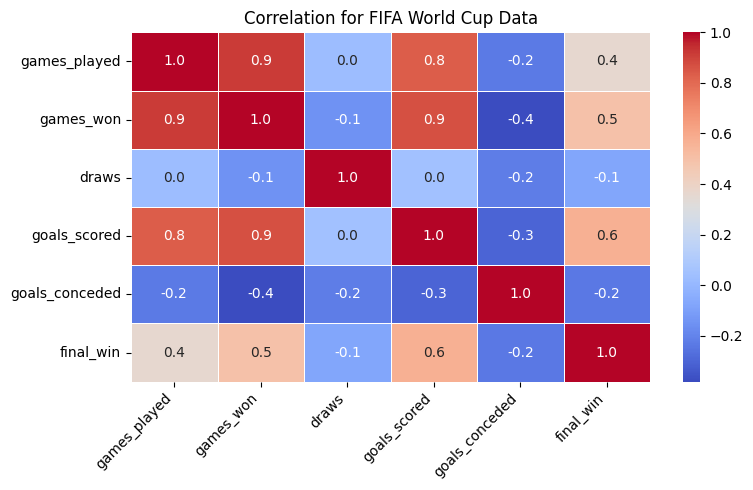

In [17]:
# Select the columns for correlation analysis

correlation_columns = ['games_played', 'games_won', 'draws', 'goals_scored', 'goals_conceded', 'final_win']
correlation_data = fifa_data[correlation_columns]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create the heatmap
plt.figure(figsize=(8, 5))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title('Correlation for FIFA World Cup Data')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.yticks(rotation=0)  # Keep y-axis labels vertical
plt.tight_layout()
plt.show()

## **Machine Learning Model**

**Preprocessing Dataset**

Split Train and Test

In [18]:
# Select features and target variable
features = ['games_played', 'games_won', 'draws', 'goals_scored', 'goals_conceded']
target = 'final_win'  # Example target (binary: 0 or 1)
X = fifa_data[features]
y = fifa_data[target]

print(X)


     games_played  games_won  draws  goals_scored  goals_conceded
0               6          4      0            14              10
1               6          6      0            25               5
2               6          4      0            18               7
3               6          4      0            13              10
4               4          2      0             8               5
..            ...        ...    ...           ...             ...
131             3          0      1             5               7
132             3          0      0             1              20
133             3          0      2             3               4
134             3          0      0             1               5
135             3          1      0             2               5

[136 rows x 5 columns]


In [19]:
print(y)

0      0
1      1
2      0
3      0
4      0
      ..
131    0
132    0
133    0
134    0
135    0
Name: final_win, Length: 136, dtype: int64


Training and Testing sets

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)

print(X.shape, X_train.shape, X_test.shape)

(136, 5) (68, 5) (68, 5)


Accuracy for train data

In [21]:
# Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

# Model Evaluation for test features
X_train_pred = model.predict(X_train)

# calculate accuracy
train_data_accuracy = accuracy_score(X_train_pred, y_train)
print(f"Train data Accuracy: {train_data_accuracy * 100:.2f}%")

Train data Accuracy: 100.00%


Accuracy for test data

In [22]:
# Model Training
model = LogisticRegression()
model.fit(X_test, y_test)

y_pred = model.predict(X_test)
X_test_pred = model.predict(X_test)

testing_data_accuracy = accuracy_score(X_test_pred, y_test)
print(f"Testing data Accuracy: {testing_data_accuracy * 100:.2f}%")

Testing data Accuracy: 98.53%


**Find Accuracy Score Mean Value Using Models**
* Logistic Regression
* Random Forest Classifier

Logistic Regression

In [23]:
# Create and train Logistic Regression model
logistic_model = LogisticRegression()
logistic_scores = cross_val_score(logistic_model, X, y, cv=5)

# Print average accuracy for Logistic Regression
print(f"Logistic Regression Accuracy: {logistic_scores.mean() * 100:.2f}%")

Logistic Regression Accuracy: 97.83%


Random Forest Classifier

In [24]:
# Create and train Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=10)
random_forest_scores = cross_val_score(random_forest_model, X, y, cv=5)

# Print average accuracy for Random Forest
print(f"Random Forest Accuracy: {random_forest_scores.mean() * 100:.2f}%")

Random Forest Accuracy: 98.52%


**Observation:** The Logistic Regression model and the Random Forest Classifier were evaluated using 5-fold cross-validation to estimate their performance. The mean accuracy scores obtained for both models provide insights into their predictive capabilities.
Based on these scores,Random Forest achieved a slightly higher accuracy (approximately 98.52%) compared to Logistic Regression (approximately 97.83%). This indicates that, for this specific dataset and prediction task, both models are good fit.

**Apply model to the dataset to generate Predictions**

In [25]:
# Input data
input_data = (6,4,0,14,10)

# Convert to NumPy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Convert to Pandas DataFrame with correct column names
input_data_df = pd.DataFrame(input_data_reshaped, columns=['games_played', 'games_won', 'draws', 'goals_scored', 'goals_conceded'])

# Make prediction using the DataFrame
prediction = model.predict(input_data_df)

# Interpret prediction
if prediction[0] == 0:
    print("Team is predicted to lose the final.")
else:
    print("Team is predicted to win the final.")

Team is predicted to lose the final.


**Conclusion:** Logistic Regression seems to be a good fit for predicting the final win based on the given features of FIFA World Cup dataset.